In [ ]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
print(f"Is Cuda built? {torch.backends.cuda.is_built()}")

Is Cuda built? True


In [ ]:
print(torch.cuda.is_available())

False


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

0-Dimension

In [ ]:
scalar = torch.tensor(7)
scalar

tensor(7)

In [ ]:
scalar.ndim

0

In [ ]:
scalar.item()

7

1-Dimension

In [ ]:
vector = torch.tensor([7,7])
vector

tensor([7, 7])

In [ ]:
vector.ndim

1

In [ ]:
vector.shape

torch.Size([2])

2-Dimension:

In [ ]:
matrix = torch.tensor([[7,8],
                       [9,10]])
matrix

tensor([[ 7,  8],
        [ 9, 10]])

In [ ]:
matrix.ndim

2

In [ ]:
matrix.shape

torch.Size([2, 2])

In [ ]:
matrix[1]

tensor([ 9, 10])

3-Dimension:

In [ ]:
tensor = torch.tensor([[[1,2,3],
                        [3,6,9],
                        [2,4,5]]])
tensor

tensor([[[1, 2, 3],
         [3, 6, 9],
         [2, 4, 5]]])

In [ ]:
tensor.ndim

3

In [ ]:
tensor.shape

torch.Size([1, 3, 3])

Random Tensor:

In [ ]:
random_tensor = torch.rand(3,4)
random_tensor

tensor([[0.9246, 0.5228, 0.8232, 0.5645],
        [0.9002, 0.3070, 0.1275, 0.8372],
        [0.8601, 0.6087, 0.4485, 0.8722]])

In [ ]:
random_image_size_tensor = torch.rand(size=(224,224,3))
random_image_size_tensor.shape, random_image_size_tensor.ndim

(torch.Size([224, 224, 3]), 3)

In [ ]:
random_image_size_tensor

tensor([[[0.1110, 0.0789, 0.7443],
         [0.9951, 0.2593, 0.5700],
         [0.9660, 0.5855, 0.1806],
         ...,
         [0.8580, 0.6938, 0.1894],
         [0.6344, 0.6109, 0.3714],
         [0.8050, 0.6836, 0.4588]],

        [[0.7058, 0.3185, 0.3884],
         [0.0106, 0.1272, 0.4817],
         [0.2048, 0.8484, 0.0384],
         ...,
         [0.8909, 0.4412, 0.9247],
         [0.4615, 0.2935, 0.4566],
         [0.0651, 0.1667, 0.5851]],

        [[0.6220, 0.3387, 0.6498],
         [0.8990, 0.0022, 0.7925],
         [0.6426, 0.3611, 0.1344],
         ...,
         [0.0776, 0.1036, 0.0425],
         [0.4534, 0.5484, 0.0061],
         [0.8149, 0.6298, 0.8125]],

        ...,

        [[0.1185, 0.5485, 0.9891],
         [0.4859, 0.5057, 0.6888],
         [0.4535, 0.0304, 0.8571],
         ...,
         [0.8256, 0.3434, 0.6319],
         [0.1914, 0.2393, 0.5575],
         [0.1366, 0.8233, 0.4764]],

        [[0.9533, 0.4270, 0.0276],
         [0.2474, 0.5036, 0.0451],
         [0.

In [ ]:
zeros = torch.zeros(size=(3,4))
zeros

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [ ]:
ones = torch.ones(size=(3,4))
ones

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [ ]:
#default data type:
ones.dtype

torch.float32

Always check the dtype before using pre-trained models

In [ ]:
float_32_tensor = torch.tensor([3.0,6.0,9.0],
                               dtype=None,
                               device=None, #What device your tensor on?
                               requires_grad=False) # Whetjer or not to track gradients with this tensors operations
float_32_tensor

tensor([3., 6., 9.])

In [ ]:
float_32_tensor.dtype

torch.float32

In [ ]:
float_32_tensor.type(torch.float16) # converting to float16

tensor([3., 6., 9.], dtype=torch.float16)

Usual Errors:

1) Data type
2) Shape
3) Device

In [ ]:
tensor

tensor([[[1, 2, 3],
         [3, 6, 9],
         [2, 4, 5]]])

Addition:

In [ ]:
tensor + 10

tensor([[[11, 12, 13],
         [13, 16, 19],
         [12, 14, 15]]])

Multiplication:

In [ ]:
torch.matmul(tensor,tensor)

tensor([[[ 13,  26,  36],
         [ 39,  78, 108],
         [ 24,  48,  67]]])

In [ ]:
tensor @ tensor

tensor([[[ 13,  26,  36],
         [ 39,  78, 108],
         [ 24,  48,  67]]])

Transpose:

In [ ]:
tensor.T

<ipython-input-41-658225b2fec8>:1: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3697.)
  tensor.T


tensor([[[1],
         [3],
         [2]],

        [[2],
         [6],
         [4]],

        [[3],
         [9],
         [5]]])

Creating our first Model:

Workflow:

1) Data (Load and clean data) 2) Build Model
3) fit model to data (training)
4) Evaluate model
5)Save and reload model:

In [ ]:
import torch
import torch.nn as nn
from pathlib import Path

torch.__version__

'2.4.1+cu121'

Simple Linear Regression:

In [ ]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * x + bias

X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X), len(y)

(50, 50)

In [ ]:
train_split = int(0.8 * len(X))
X_train, X_test = X[:train_split], X[train_split:]
y_train, y_test = y[:train_split], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
!pip install matplotlib
import matplotlib.pyplot as plot # Import the matplotlib library and assign it to the alias 'plot'

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  plot.figure(figsize=(10,7))

  plot.scatter(train_data,train_labels,c="b",s=4,label="Training Data")
  plot.scatter(test_data,test_labels,c="g",s=4,label="Test Data")

  if predictions is not None:
    plot.scatter(test_data,predictions,c="r",s=4,label="Predictions")
  plot.legend(prop={"size":14})

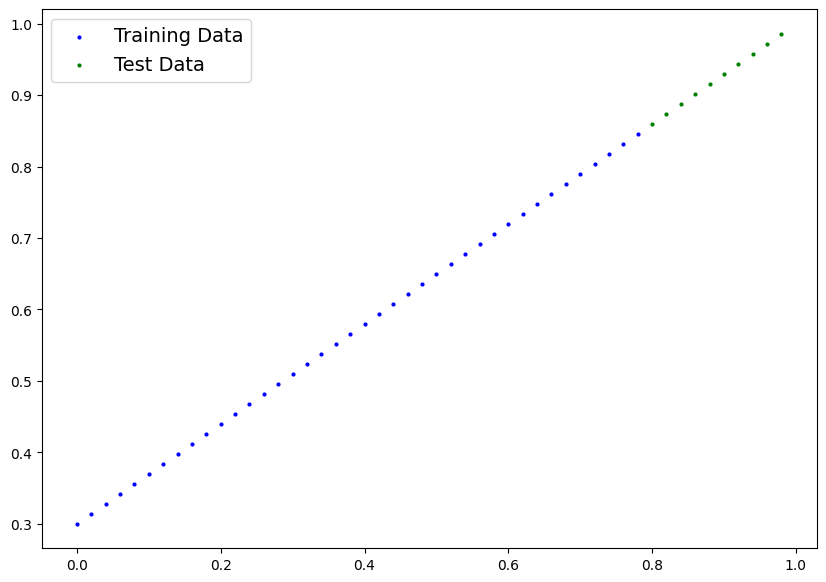

In [ ]:
plot_predictions(X_train,y_train, X_test, y_test)

In [ ]:
class LinearRegressionModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,dtype=torch.float32, requires_grad=True)) # Changed nn.parameter to nn.Parameter
    self.bias = nn.Parameter(torch.randn(1,dtype=torch.float32, requires_grad=True)) # Changed nn.parameter to nn.Parameter

    #Logic on how the data moves forward:
  def forward(self,x:torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

In [ ]:
torch.manual_seed(42)
model_0 = LinearRegressionModelV1()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

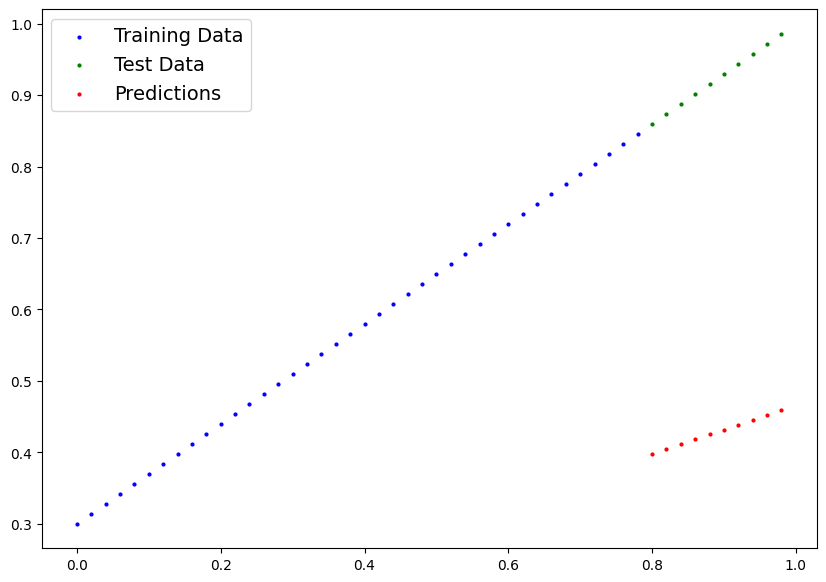

In [ ]:
with torch.inference_mode():
  y_preds = model_0(X_test)

plot_predictions(predictions=y_preds)

Loss Funtions:

Difference between predicted and ground truth and update our paramters:

In [ ]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.01)

A learning rate of 0.01 means that for each step in the optimization process, the parameters are adjusted by 1% of the computed gradient.
If the learning rate is too large, the optimizer may overshoot the minimum of the loss function. If it's too small, convergence may be slow.

In [ ]:
torch.manual_seed(42)

# This line sets the random seed to ensure reproducibility.
# By fixing the seed, the random number generators in PyTorch
# will produce the same sequence of random numbers every time the code is run,
# leading to consistent results (e.g., same weight initialization and data shuffling).


epochs = 200

epoch_count = []
test_loss_values = []
train_loss_values = []

for epoch in range(epochs):
  model_0.train()

  y_pred = model_0(X_train)

  loss = loss_fn(y_pred,y_train)

  optimizer.zero_grad()

  #.      The function optimizer.zero_grad() is used in PyTorch to reset the gradients
  #.      of the model’s parameters to zero before the next iteration of the optimization loop.

  loss.backward() #back propogation

  optimizer.step()

  model_0.eval()

  with torch.inference_mode():
    test_pred = model_0(X_test)
    test_loss = loss_fn(test_pred,y_test)

  print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss {test_loss}")

  epoch_count.append(epoch)
  test_loss_values.append(test_loss.detach().numpy())
  train_loss_values.append(loss.detach().numpy())

Epoch: 0 | MAE Train Loss: 0.0025885067880153656 | MAE Test Loss 0.008447891101241112
Epoch: 1 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss 0.005023092031478882
Epoch: 2 | MAE Train Loss: 0.0025885067880153656 | MAE Test Loss 0.008447891101241112
Epoch: 3 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss 0.005023092031478882
Epoch: 4 | MAE Train Loss: 0.0025885067880153656 | MAE Test Loss 0.008447891101241112
Epoch: 5 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss 0.005023092031478882
Epoch: 6 | MAE Train Loss: 0.0025885067880153656 | MAE Test Loss 0.008447891101241112
Epoch: 7 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss 0.005023092031478882
Epoch: 8 | MAE Train Loss: 0.0025885067880153656 | MAE Test Loss 0.008447891101241112
Epoch: 9 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss 0.005023092031478882
Epoch: 10 | MAE Train Loss: 0.0025885067880153656 | MAE Test Loss 0.008447891101241112
Epoch: 11 | MAE Train Loss: 0.008932482451200485 | MAE Tes

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])

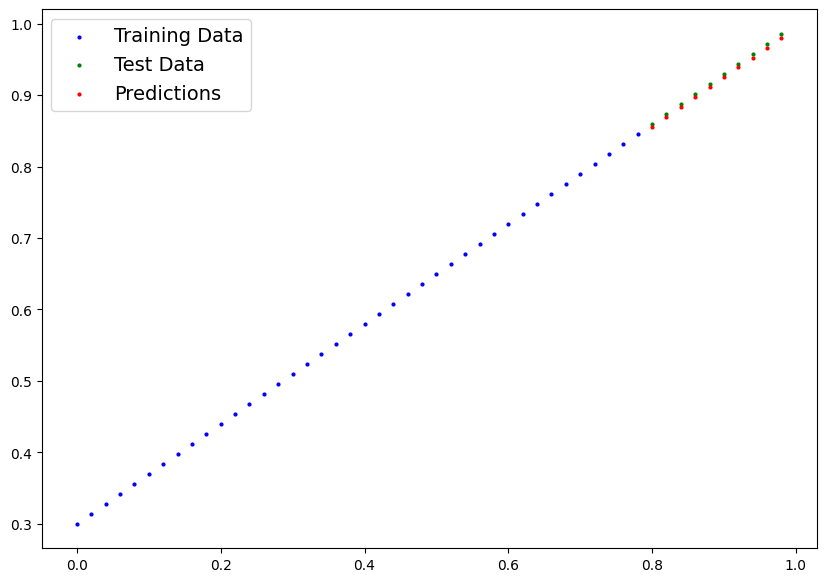

In [ ]:
with torch.inference_mode():
  y_preds = model_0(X_test)

plot_predictions(predictions=y_preds)

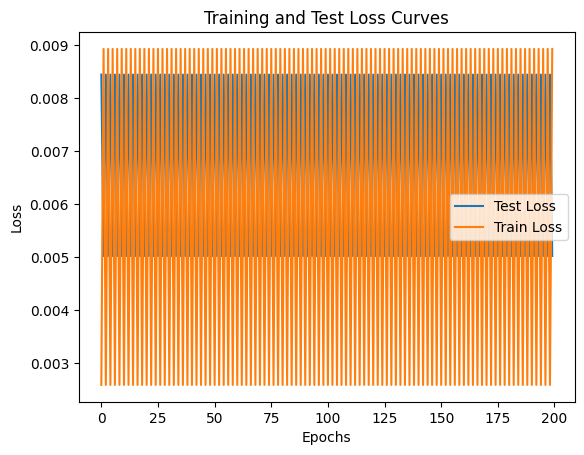

In [ ]:
plt.plot(epoch_count,test_loss_values,label="Test Loss")
plt.plot(epoch_count,train_loss_values,label="Train Loss")
plt.title("Training and Test Loss Curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()